<a href="https://colab.research.google.com/github/hildj/DS3001_TeamM_Project/blob/main/scripts/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset
df = pd.read_csv('/content/hospital data cleaned.csv')
df.head()

,YEAR,HOSPITAL,Procedure/Condition,Risk Adjuested Mortality Rate,Risk Adjuested Mortality Rate.1,Hospital Ratings
0,2023,Adventist Health and Rideout,AMI,7.0,7.0,As Expected
1,2023,Adventist Health and Rideout,Acute Stroke,5.3,5.3,As Expected
2,2023,Adventist Health and Rideout,Carotid Endarterectomy,3.1,3.1,As Expected
3,2023,Adventist Health and Rideout,GI Hemorrhage,2.2,2.2,As Expected
4,2023,Adventist Health and Rideout,Heart Failure,4.0,4.0,As Expected


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

# Formatting of dataset
df = df.drop('Risk Adjuested Mortality Rate.1', axis = 1)
df = df.drop('YEAR', axis = 1)
df = df.rename(columns={'Risk Adjuested Mortality Rate': 'Risk Adjusted Mortality Rate'})

df.head()

,HOSPITAL,Procedure/Condition,Risk Adjusted Mortality Rate,Hospital Ratings
0,Adventist Health and Rideout,AMI,7.0,As Expected
1,Adventist Health and Rideout,Acute Stroke,5.3,As Expected
2,Adventist Health and Rideout,Carotid Endarterectomy,3.1,As Expected
3,Adventist Health and Rideout,GI Hemorrhage,2.2,As Expected
4,Adventist Health and Rideout,Heart Failure,4.0,As Expected


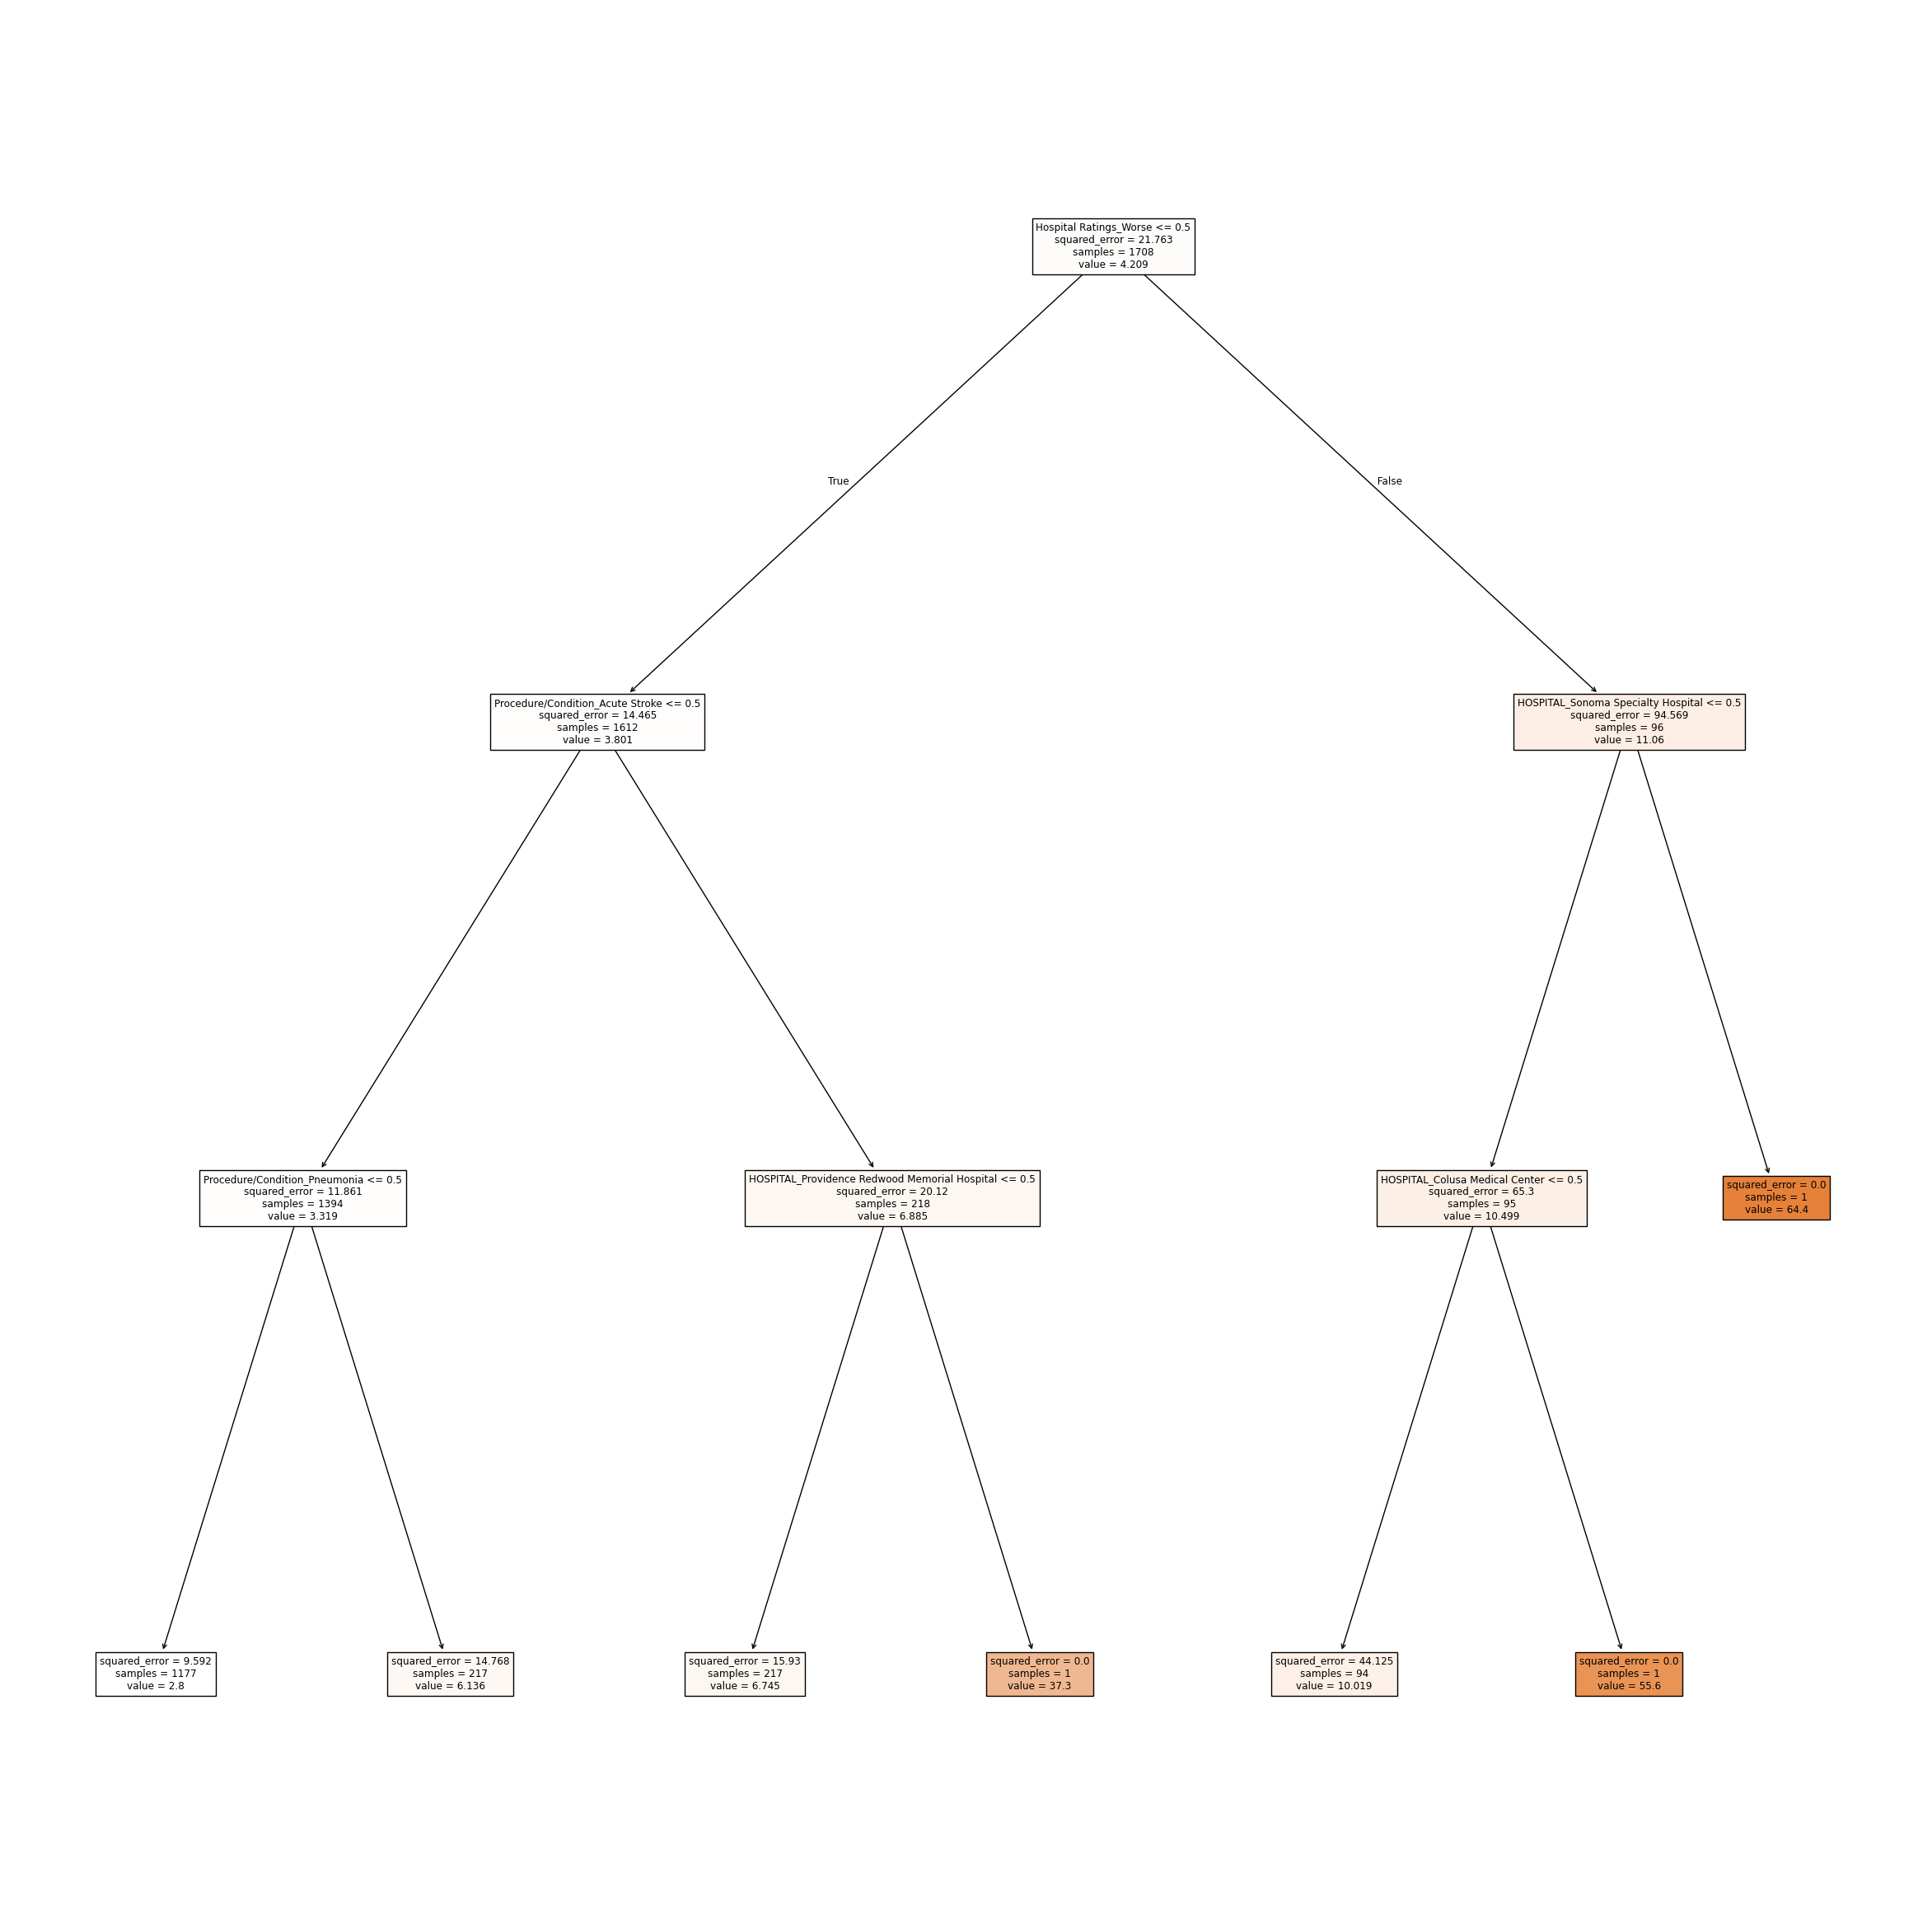

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import the tree regressor

# Process data:
y = df['Risk Adjusted Mortality Rate'] # Target variable is now numerical

# Identify categorical columns for one-hot encoding, including 'Hospital Ratings'
categorical_cols = ['HOSPITAL', 'Procedure/Condition', 'Hospital Ratings']

# Apply one-hot encoding
X_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols, drop_first=True)

# Drop original categorical columns and the target variable from X, then concatenate with encoded columns
X = df.drop(['Risk Adjusted Mortality Rate'] + categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

from sklearn.model_selection import train_test_split # Train/test splitter

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

# Visualize results:
plt.figure(figsize=(30,30))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

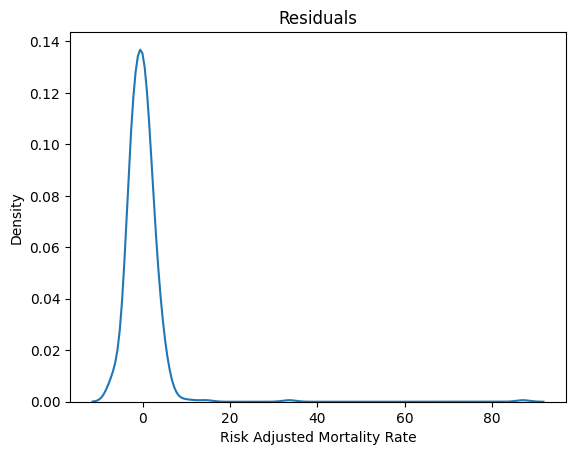

Rsq:  0.17282668050339378
RMSE:  5.2380502209723545


In [ ]:
## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e).set(title='Residuals')
plt.show()

rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq)
print('RMSE: ', RMSE)
